In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [18]:
df = pd.read_csv("condmilk.csv", delimiter=';', dtype={'v1':float})
df['month'] = range(1, len(df) + 1)
df.head()

,v1,month
0,81.28,1
1,69.39,2
2,67.63,3
3,51.25,4
4,103.97,5


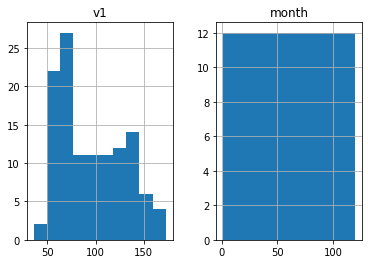

In [20]:
df.hist()
plt.show()

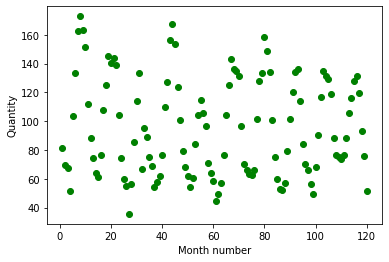

In [23]:
plt.scatter(df.month, df.v1, color = 'green')
plt.xlabel('Month number')
plt.ylabel('Quantity')
plt.show()

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = np.asanyarray(df[['month']])
Y = np.asanyarray(df[['v1']])
regr.fit(X, Y)

print('Coeff', regr.coef_)
print('Intercept', regr.intercept_)

Coeff [[-0.04729169]]
Intercept [98.68964706]


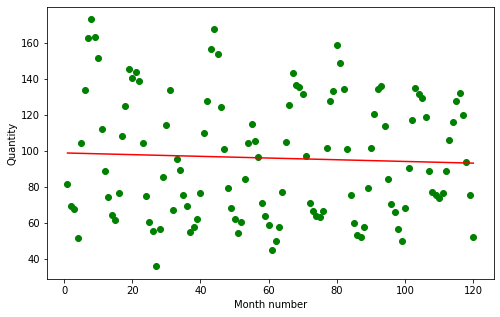

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(df.month, df.v1, color = 'green')
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], '-r')
plt.xlabel('Month number')
plt.ylabel('Quantity')
plt.show()

In [60]:
last_mn = len(df) + 1
for x in range(last_mn, last_mn + 8):
    new_df = pd.DataFrame([[regr.predict([[x]])[0][0], x]], columns=['v1', 'month'])
    df = df.append(new_df, ignore_index=True)
    print('Month: {}  Condensed milk quantity: {}'.format(x, regr.predict([[x]])[0][0]))

Month: 121  Condensed milk quantity: 92.96735294117646
Month: 122  Condensed milk quantity: 92.92006125425375
Month: 123  Condensed milk quantity: 92.87276956733106
Month: 124  Condensed milk quantity: 92.82547788040836
Month: 125  Condensed milk quantity: 92.77818619348565
Month: 126  Condensed milk quantity: 92.73089450656295
Month: 127  Condensed milk quantity: 92.68360281964024
Month: 128  Condensed milk quantity: 92.63631113271754


,v1,month
0,81.280000,1
1,69.390000,2
2,67.630000,3
3,51.250000,4
4,103.970000,5
...,...,...
123,92.825478,124
124,92.778186,125
125,92.730895,126
126,92.683603,127


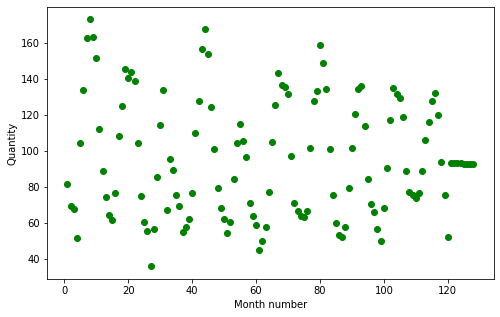

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(df.month, df.v1, color = 'green')
plt.xlabel('Month number')
plt.ylabel('Quantity')
plt.show()